# Machine Learning for Deprived Area Mapping (ML4DAM)

## Using Contextual features extracted from Sentinel 2

In [81]:
# imprt libraries 
import os 
from glob import glob
import numpy as np
import pandas as pd
from osgeo import gdal
import rasterio 
from rasterio.plot import show
from rasterio.merge import merge
import matplotlib.pyplot as plt

from utils import utils
from utils import util_preprocess


Set Working directorate 

In [82]:
# Get abosolute path of the current folder
abspath_curr = 'D:/GWU/ML4DAM/'

# Target
target = 'class'

# Random seed
random_seed = 42

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

## Fetch and load contextual features 

In [83]:
# load contextual ffeature 

RasterTiles = sorted(glob('D:/GWU/ML4DAM/data/accra/final/spfea/*.tif'))
MaskTiles = sorted(glob('D:/GWU/ML4DAM/data/accra/final//mask/*.tif'))

In [84]:
Tiles = []
for item in zip(RasterTiles, MaskTiles):
    # print(item)
    Tiles.append(item)


len(Tiles)

import random
random.seed(42)
random.shuffle(Tiles)

In [85]:
# import random
# random.shuffle(Tiles)

Tiles[1]

('D:/GWU/ML4DAM/data/accra/final/spfea\\acc_area8.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area8.tif')

In [86]:
RasterTiles = []
MaskTiles = []
for raw_image, label in Tiles:
    RasterTiles.append(raw_image)
    MaskTiles.append(label)


In [87]:
MaskTiles

['D:/GWU/ML4DAM/data/accra/final//mask\\acc_area4.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area8.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area3.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area2.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area9.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area7.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area13.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area10.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area5.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area11.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area12.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area0.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area1.tif',
 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area6.tif']

In [88]:
X_train_list = RasterTiles[0:7]
X_val_list = RasterTiles[8:10]
X_test_list = RasterTiles[11:13]


y_train_list = MaskTiles[0:7]
y_val_list = MaskTiles[8:10]
y_test_list = MaskTiles[11:13]


In [89]:
print(X_train_list[1:6])
print(y_train_list[1:6])

['D:/GWU/ML4DAM/data/accra/final/spfea\\acc_area8.tif', 'D:/GWU/ML4DAM/data/accra/final/spfea\\acc_area3.tif', 'D:/GWU/ML4DAM/data/accra/final/spfea\\acc_area2.tif', 'D:/GWU/ML4DAM/data/accra/final/spfea\\acc_area9.tif', 'D:/GWU/ML4DAM/data/accra/final/spfea\\acc_area7.tif']
['D:/GWU/ML4DAM/data/accra/final//mask\\acc_area8.tif', 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area3.tif', 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area2.tif', 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area9.tif', 'D:/GWU/ML4DAM/data/accra/final//mask\\acc_area7.tif']


### Process train, validationa and test data

In [90]:
# Preparing training

raster_to_mosiac = []

for p in X_train_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)


Xtrain, out_transform = merge(raster_to_mosiac)
print(Xtrain.shape)

raster_to_mosiac = []

for p in y_train_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)

ytrain, out_transform = merge(raster_to_mosiac)
print(ytrain.shape)

# Preparing validation 

raster_to_mosiac = []

for p in X_val_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)


Xval, out_transform = merge(raster_to_mosiac)
print(Xval.shape)

raster_to_mosiac = []

for p in y_val_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)

yval, out_transform = merge(raster_to_mosiac)
print(yval.shape)



# Preparing test data

raster_to_mosiac = []

for p in X_test_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)


Xtest, out_transform = merge(raster_to_mosiac)
print(Xtest.shape)

raster_to_mosiac = []

for p in y_test_list:
    raster = rasterio.open(p)
    raster_to_mosiac.append(raster)

ytest, out_transform = merge(raster_to_mosiac)
print(ytest.shape)


(45, 1081, 1297)
(1, 1081, 1297)
(45, 1252, 689)
(1, 1252, 689)
(45, 662, 644)
(1, 662, 644)


In [91]:
X_train = Xtrain[:, Xtrain[0,...]!=-9999]
y_train = ytrain[:, ytrain[0,...]!=-9999]
y_train =y_train.astype(int)
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Training data set\n', frequencies)
print(X_train.shape)
print(y_train.shape)


X_train = np.transpose(X_train)
y_train = np.transpose(y_train)

# Validation

X_val = Xval[:, Xval[0,...]!=-9999]
y_val = yval[:, yval[0,...]!=-9999]
y_val = y_val.astype(int)
(unique, counts) = np.unique(y_val, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('\n Validation data set\n', frequencies)

print(X_val.shape)
print(y_val.shape)


X_val = np.transpose(X_val)
y_val = np.transpose(y_val)

# Test

X_test = Xtest[:, Xtest[0,...]!=-9999]
y_test = ytest[:, ytest[0,...]!=-9999]
y_yest = y_test.astype(int)
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('\n Test data set\n', frequencies)

print(X_test.shape)
print(y_test.shape)


X_test = np.transpose(X_test)
y_test = np.transpose(y_test)


Training data set
 [[     0 251373]
 [     1  71557]]
(45, 322930)
(1, 322930)

 Validation data set
 [[    0 73732]
 [    1 18718]]
(45, 92450)
(1, 92450)

 Test data set
 [[0.0000e+00 5.6382e+04]
 [1.0000e+00 3.5853e+04]]
(45, 92235)
(1, 92235)


### Standardize data

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# # Imputing missing values
si = SimpleImputer(missing_values=0, strategy='mean')

# impute the training data
X_train = si.fit_transform(X_train)

# impute the validation data
X_val = si.fit_transform(X_val)

# impute the test data
X_test = si.fit_transform(X_test)

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.fit_transform(X_val)

# Standardize the test data
X_test = ss.fit_transform(X_test)

### Modelling 

### XGBoost

In [103]:
# import XGBClassifier
from xgboost import XGBClassifier

params = {'n_estimators': 100,
          'scale_pos_weight': 5,
          'early_stopping_rounds': 100,
          'eval_metric':'error',
          'min_child_weight':5,
          'subsample': 0.5,
          'colsample_bytree':0.5,
          'max_depth' : 5,
          'gamma':0.05
         }

model = XGBClassifier(**params, validate_parameters=True, random_state=random_seed)
model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-error:0.41368	validation_1-error:0.52194
[1]	validation_0-error:0.40818	validation_1-error:0.51760
[2]	validation_0-error:0.38774	validation_1-error:0.49111
[3]	validation_0-error:0.38126	validation_1-error:0.47860
[4]	validation_0-error:0.38663	validation_1-error:0.48857
[5]	validation_0-error:0.37404	validation_1-error:0.47902
[6]	validation_0-error:0.37236	validation_1-error:0.47524
[7]	validation_0-error:0.37156	validation_1-error:0.47558
[8]	validation_0-error:0.37023	validation_1-error:0.47413
[9]	validation_0-error:0.36304	validation_1-error:0.46746
[10]	validation_0-error:0.35627	validation_1-error:0.46140
[11]	validation_0-error:0.35346	validation_1-error:0.45739
[12]	validation_0-error:0.35282	validation_1-error:0.45641
[13]	validation_0-error:0.34874	validation_1-error:0.45461
[14]	validation_0-error:0.34792	validation_1-error:0.45431
[15]	validation_0-error:0.34490	validation_1-error:0.45150
[16]	validation_0-error:0.34391	validation_1-error:0.45122
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=100, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0.05, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

F1: [0.7035675295830143]
Recall: [0.7819150419769615]
Precision: [0.6394908526848853]


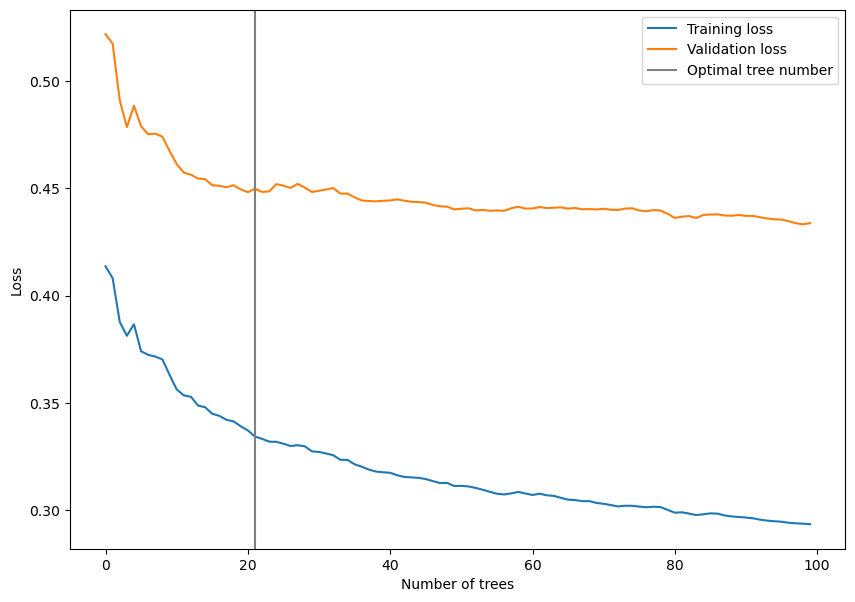

In [104]:
from catboost.utils import eval_metric
# import CatBoost

predictions = model.predict(X_test)

# best_iteration = model.get_booster().best_ntree_limit
# predict(X_test, ntree_limit=best_iteration)

F1 = eval_metric(y_test, predictions, 'F1')
Precision = eval_metric(y_test, predictions, 'Precision')
Recall = eval_metric(y_test, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

from matplotlib import pyplot as plt
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["error"], label="Training loss")
plt.plot(results["validation_1"]["error"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

### Catboost

In [124]:
from catboost import CatBoostClassifier, Pool

params = {'loss_function':'Logloss',
          'eval_metric':'F1',
          'early_stopping_rounds': 200,
          'iterations': 5000,
          'verbose': 100,
          'random_seed': random_seed,
          'l2_leaf_reg': 15,
          'bootstrap_type': 'Bernoulli',
          'learning_rate': 0.0955,
        #   'bagging_temperature': 4.5
         }

# model = CatBoostClassifier(**params, class_weights=[0.3, 0.5])
model = CatBoostClassifier(**params, scale_pos_weight=2)

model.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_val, y_val), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True, # True for visualization of the training process (it is not shown in a published kernel - try executing this code)

         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6405170	test: 0.6671019	best: 0.6671019 (0)	total: 59.1ms	remaining: 4m 55s
100:	learn: 0.6474893	test: 0.6214044	best: 0.6718479 (7)	total: 5.26s	remaining: 4m 15s
200:	learn: 0.6669996	test: 0.6095564	best: 0.6718479 (7)	total: 10.1s	remaining: 4m 2s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6718479197
bestIteration = 7

Shrink model to first 8 iterations.


In [125]:
predictions = model.predict(X_test)

F1 = eval_metric(y_test, predictions, 'F1')
Precision = eval_metric(y_test, predictions, 'Precision')
Recall = eval_metric(y_test, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)



F1: [0.7076676851447693]
Recall: [0.6782974925389786]
Precision: [0.7396964443227788]


### Save best model

In [50]:
import datetime

abspath_curr = 'D:/GWU/ML4DAM/'

# Make directory
directory = os.path.dirname(abspath_curr + '/data/accra/result/')
if not os.path.exists(directory):
    os.makedirs(directory)


MPATH = f'{abspath_curr}/data/accra/result/'
T = datetime.datetime.now()
time = T.strftime("%y%m%d%H%M%S")
filename = 'XGboost_45'
out_file = f"{MPATH}/{filename}_{time}"

model.save_model(out_file)

## Inference 

In [71]:
# PATH= f'{abspath_curr}/data/nairobi/spfea.vrt'
# PATH = 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/spfea/nai_area16.tif'
PATH = 'D:/GWU/ML4DAM/data/accra/final/spfea/acc_area10.tif'
img = utils.read_image(PATH)
img_arr=img[0]
img_gt=img[1]
img_georef=img[2]

# Process spfea features, get the width, height and number of bands
n = img_arr.shape[0]
print (n) # number of bands
h = img_arr.shape[1]
print (h) # height
w = img_arr.shape[2]
print (w) # width

45
215
215


In [72]:
arr = img_arr[:, img_arr[0,...]!=-9999]
# mask = img_arr!=0
# img_arr[mask] =  np.transpose(arr)

In [73]:
arr =  np.transpose(arr)
mask = arr!=0
mask.shape
# mask[0]


(46225, 45)

In [74]:
arr[mask].shape

(2080125,)

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

arr = img_arr[:, img_arr[0,...]!=0]
arr =  np.transpose(arr)

si = SimpleImputer(missing_values=0, strategy='mean')
# impute the training data
mapx = si.fit_transform(arr)

# Standadized 
ss = StandardScaler()
MapX = ss.fit_transform(mapx)
# img_arr[img_arr == 0] = np.nan
# # img_arr.shape
# nan_mask = np.isnan(img_arr)


# # arr_no_nan = img_arr[~nan_mask[:,:]]

# # Set all masked pixels to zero
# masked = img_arr.copy()
# new_arr=masked[nan_mask] 
# # mapX = ss.fit_transform(arr)

In [79]:
# PREDICTION 

# PREDICTION
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

# load
# C:\Users\mowus\Documents\GWU\gwu_work\ML4DAM\data\nairobi\result\XGboost_45_221229000952
new_model = XGBClassifier()
new_model.load_model(f'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/result/XGboost_45_221229000952')
# new_model.load_model(f'{abspath_curr}/data/accra/result/XGboost_45_230116101040')
# pred_map = new_model.predict(data_x_scale)

pred_map = new_model.predict(MapX)
# pred_map = new_model.predict(arr[mask].reshape(h,w))

(0, 45)

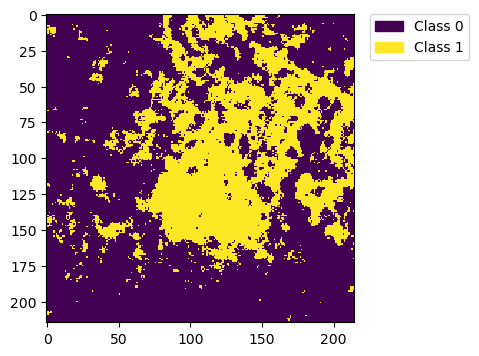

In [80]:
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

pred_map = pred_map.reshape(h, w)


values = np.unique(pred_map.ravel())

plt.figure(figsize=(8,4))
im = plt.imshow(pred_map, interpolation='none')

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Class {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()

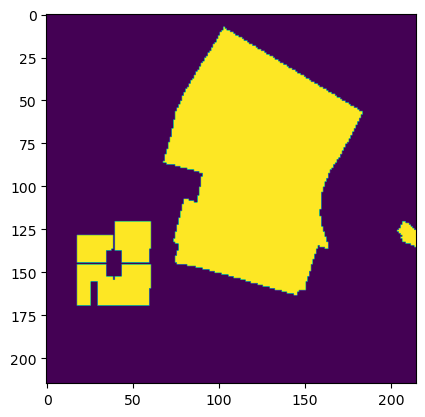

<AxesSubplot: >

In [78]:
PATH= f'D:/GWU/ML4DAM/data/accra/final/mask/acc_area10.tif'
# PATH = 'C:/Users/mowus/Documents/GWU/gwu_work/ML4DAM/data/nairobi/final/mask/nai_area16.tif'
img = utils.read_image(PATH)
img_arr=img[0]
show(img_arr)
# img_gt=img[1]
# img_georef=img[2]